In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
sns.set() #setting the default seaborn style for our plots

In [3]:
df=pd.read_csv('Insurance.csv')  

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
mean = df["charges"].mean()
mean

13270.422265141257

In [8]:
median = df["charges"].median()
median

9382.033

In [9]:
mode = df["charges"].mode()
mode

0    1639.5631
Name: charges, dtype: float64

In [10]:
df["charges"].var()

146652372.1528548

In [11]:
df["charges"].std()

12110.011236693994

In [12]:
q1=df["charges"].quantile(0.25)
q1

4740.28715

In [13]:
q2=df["charges"].quantile(0.75)
q2

16639.912515

In [14]:
q3=q2-q1
q3

11899.625365

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Exploratory Data Analysis (EDA)

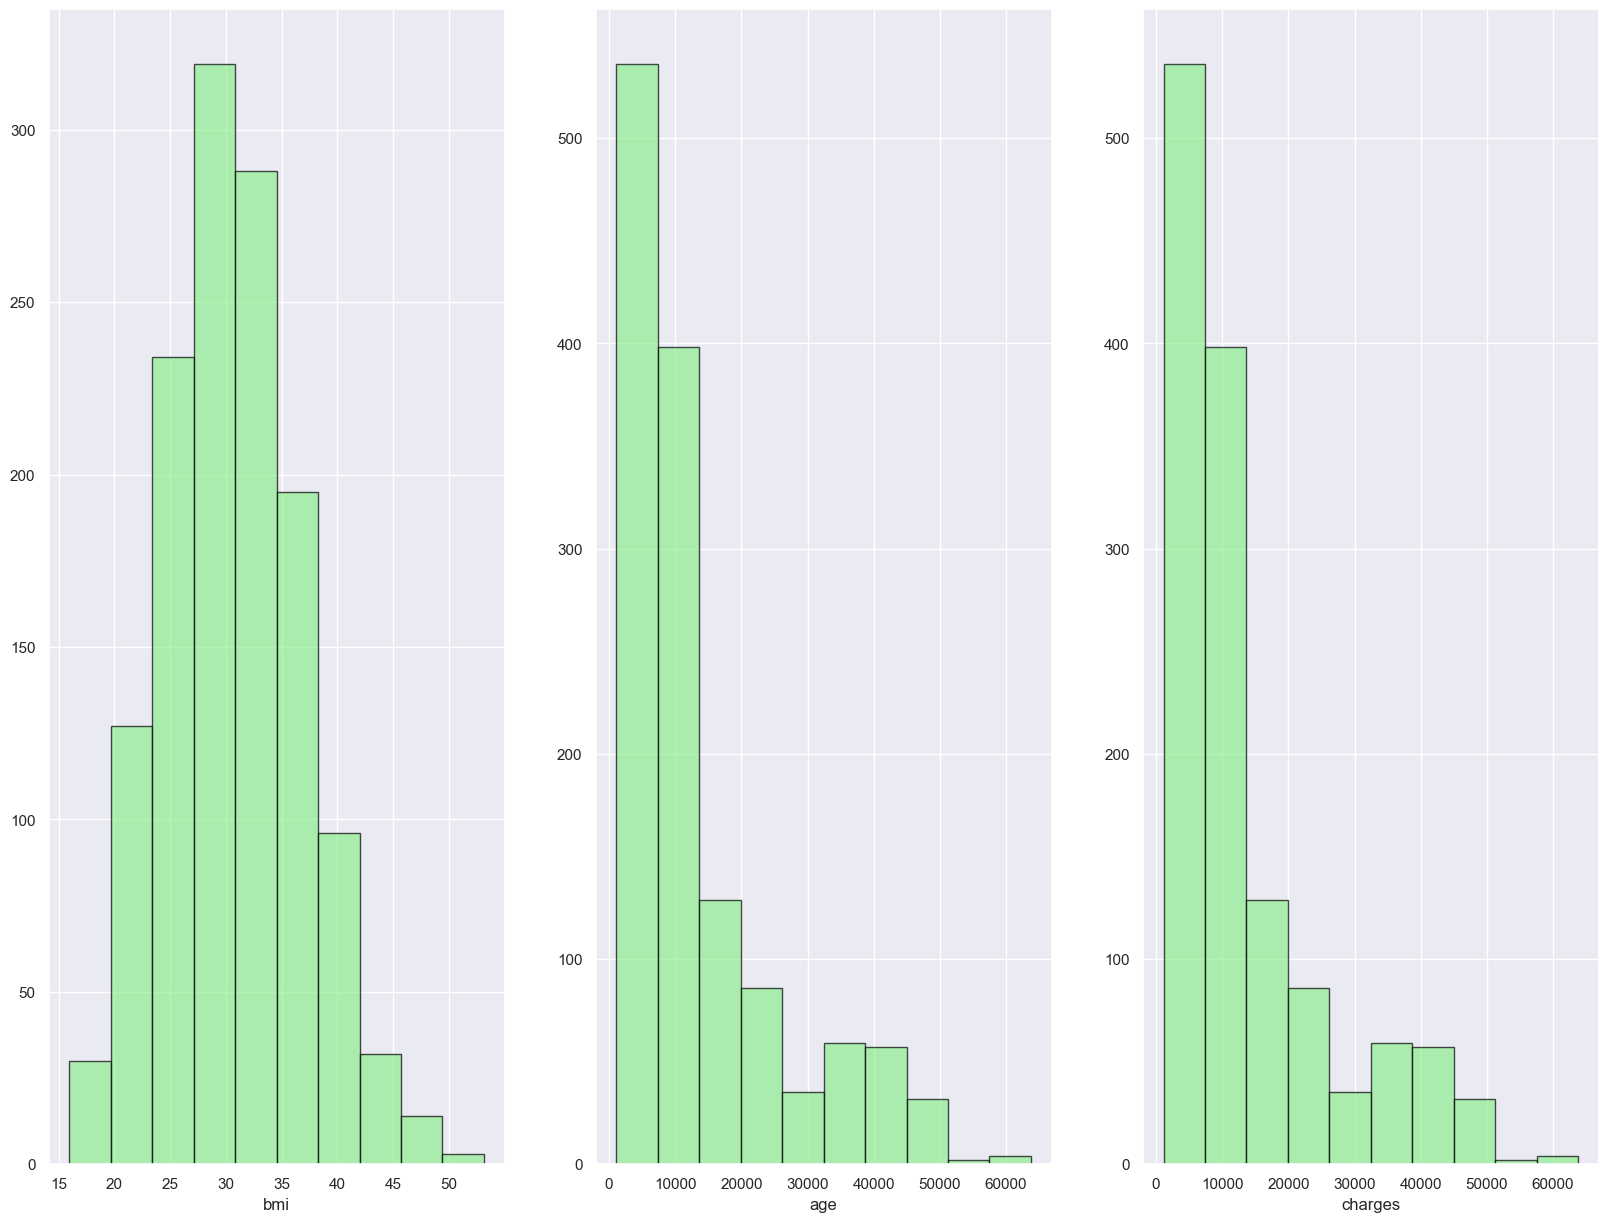

In [17]:
#plots

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.hist(df.bmi,color='lightgreen',edgecolor='black',alpha=0.7)
plt.xlabel('bmi')

plt.subplot(1,3,2)
plt.hist(df.charges,color='lightgreen',edgecolor='black',alpha=0.7)
plt.xlabel('age')

plt.subplot(1,3,3)
plt.hist(df.charges,color='lightgreen',edgecolor='black',alpha=0.7)
plt.xlabel('charges')

plt.show()

In [18]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

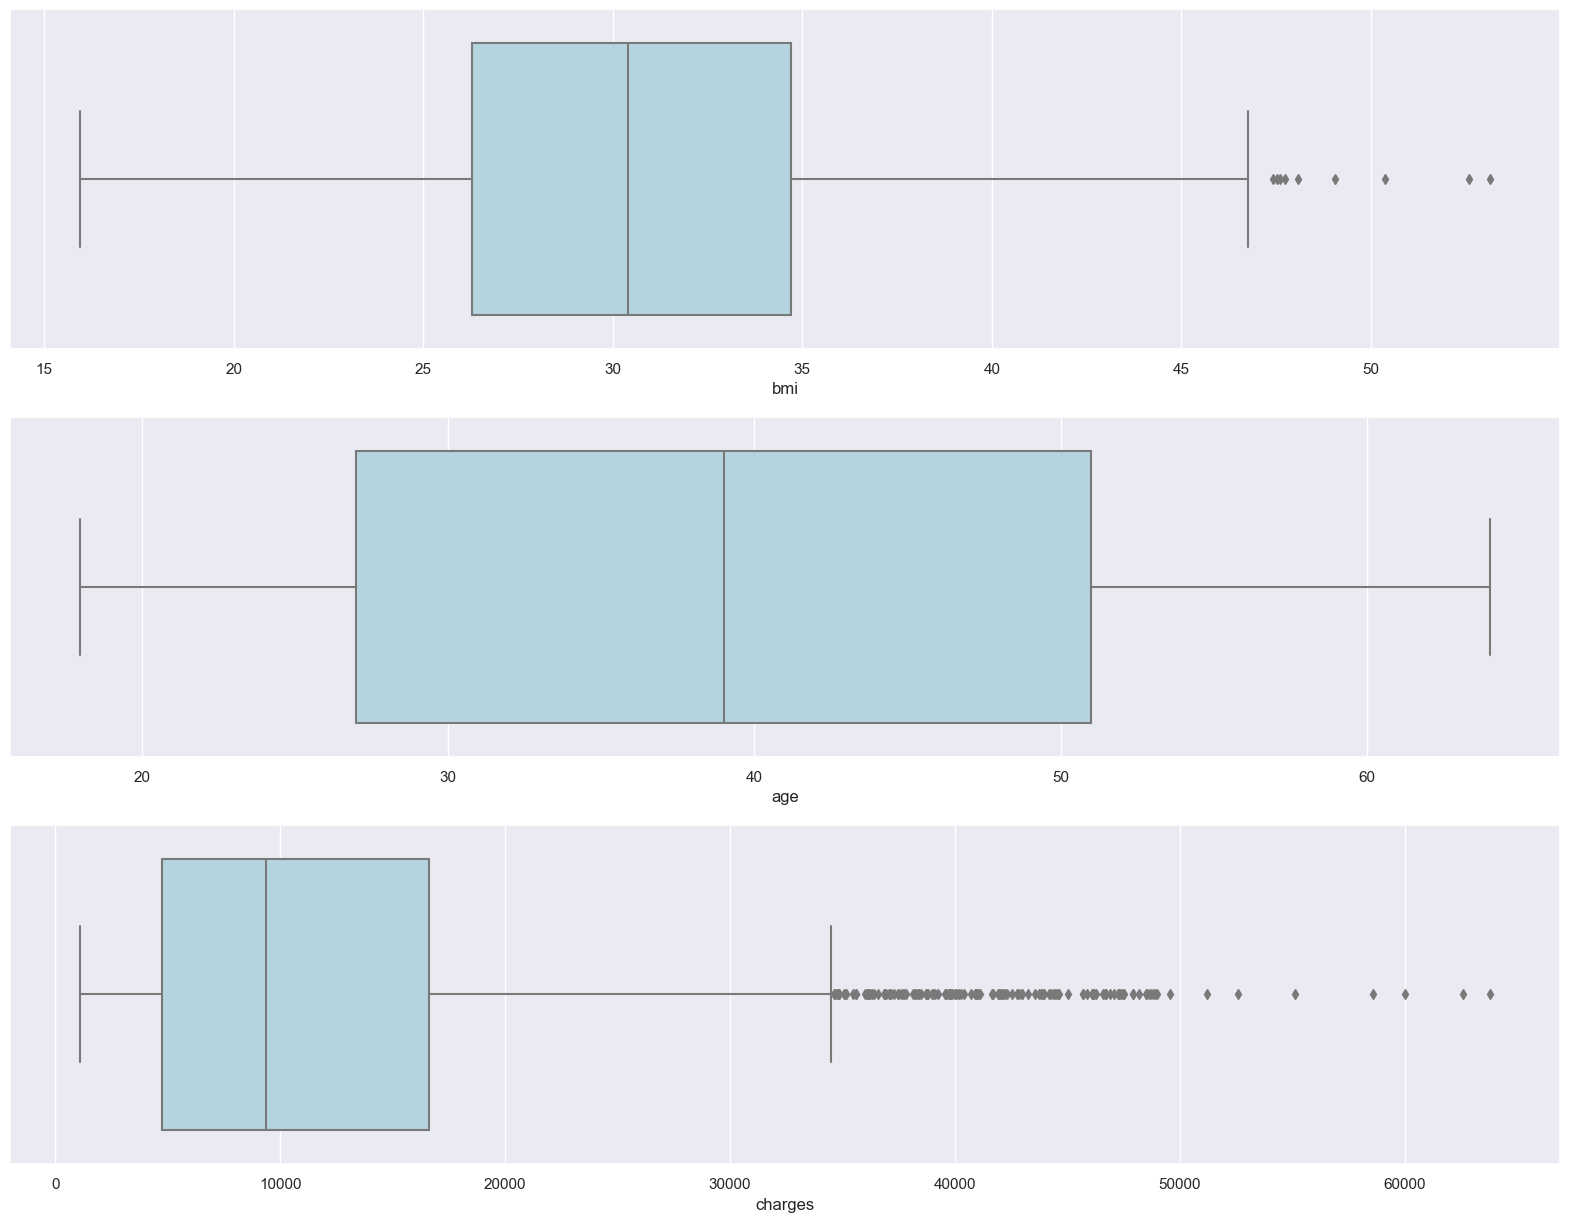

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi,color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x=df.age,color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x=df.charges,color='lightblue')

plt.show()

<Axes: xlabel='region', ylabel='count'>

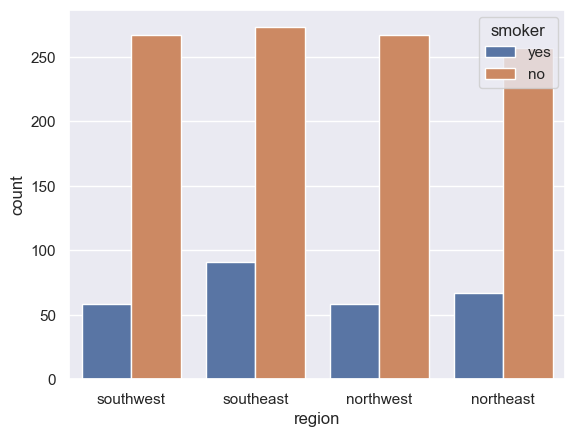

In [20]:
sns.countplot(x="region",hue="smoker",data=df)

In [21]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

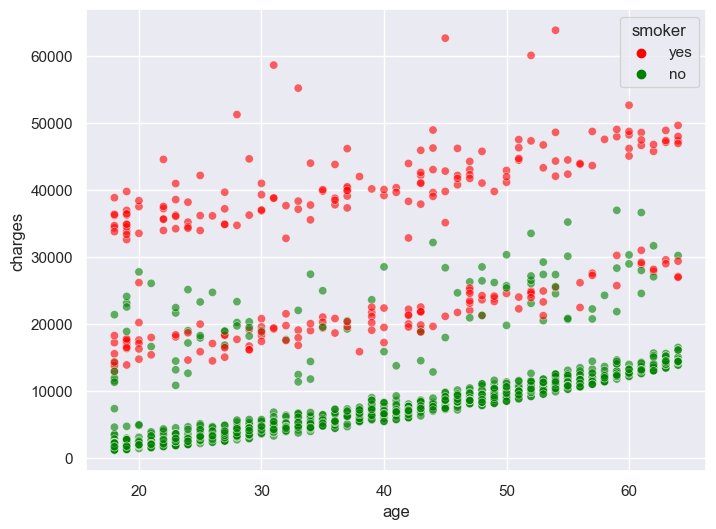

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=['red', 'green'], alpha=0.6)
plt.show()

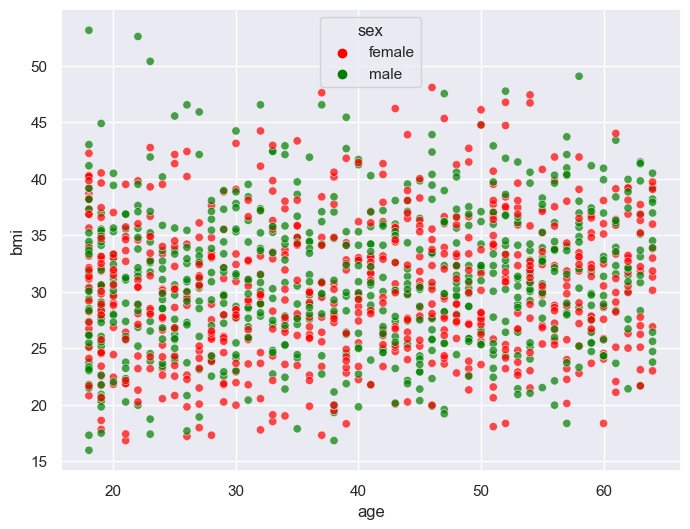

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.age, y=df.bmi, hue=df.sex, palette=['red', 'green'], alpha=0.7)
plt.show()

In [24]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.3975

In [25]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
IQR

11899.625365

In [26]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

24.0

In [27]:
Q1 = df['children'].quantile(0.25)
Q3 = df['children'].quantile(0.75)
IQR = Q3 - Q1
IQR

2.0

In [28]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### In Boxplots, we can see their are some outliers in numeric columns so to remove outliers, we can calculate z-score, IQR or Tukey's method (Median Absolute Deviation (MAD) method).

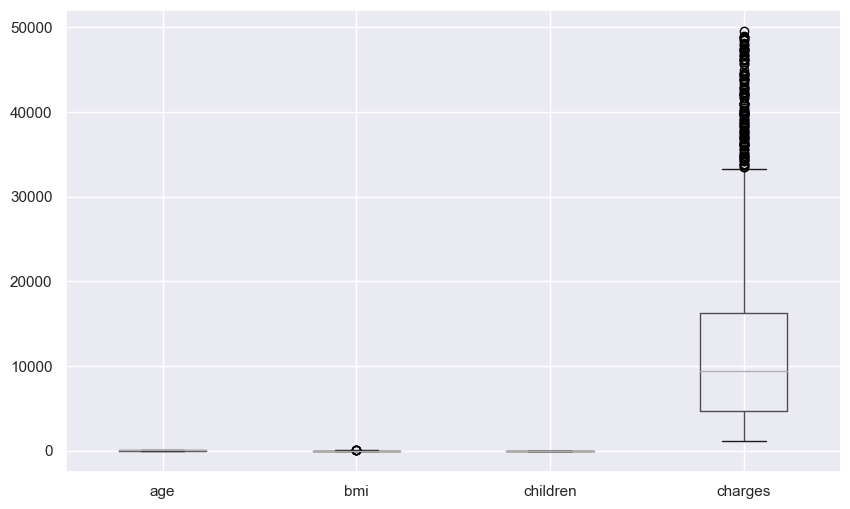

In [29]:
# Calculate z-scores for each numeric column
for col in ['age', 'bmi', 'children', 'charges']:
    z = (df[col] - df[col].mean()) / df[col].std()
    outlier_mask = np.abs(z) > 3
    df.loc[outlier_mask, col] = df[col].median()
# Create a boxplot to visualize the data
df.boxplot(figsize=(10, 6))
plt.show()

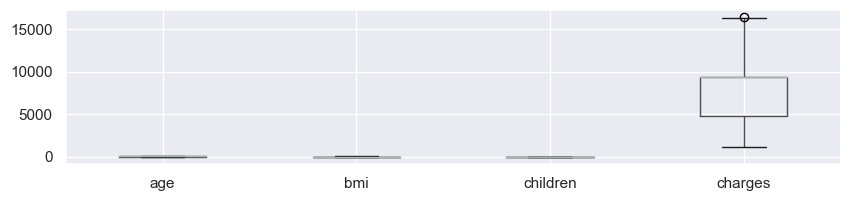

In [37]:
## OR 
## Calculate IQR for each numeric column
for col in ['age', 'bmi', 'children','charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers using the IQR method
    outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.loc[outlier_mask, col] = df[col].median()

# Create a boxplot to visualize the data
df.boxplot(figsize=(10, 2))
plt.show()

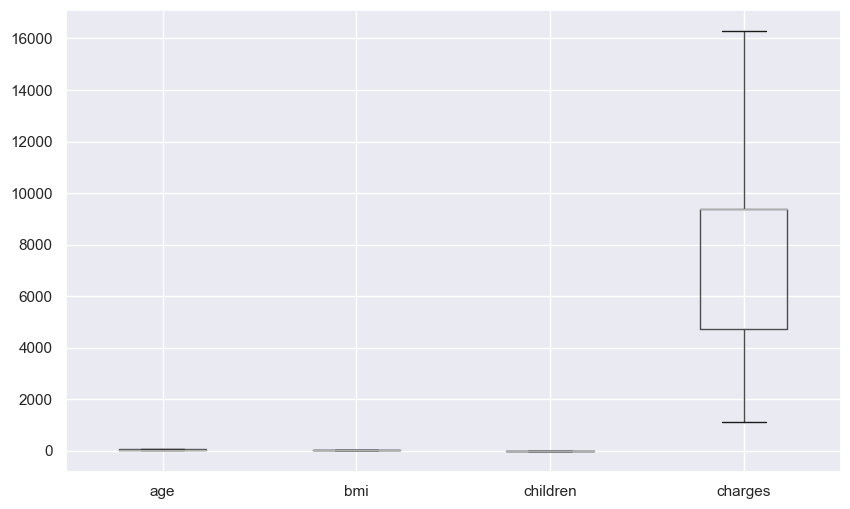

In [39]:
## Calculate Tukey's boundaries for each numeric column
for col in ['age', 'bmi', 'children', 'charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers using Tukey's method
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    df.loc[outlier_mask, col] = df[col].median()

# Create a boxplot to visualize the data
df.boxplot(figsize=(10, 6))
plt.show()

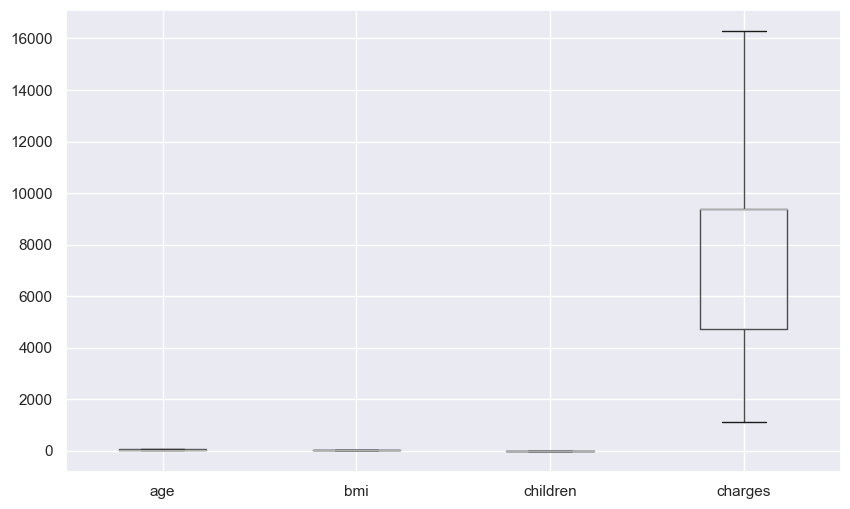

In [40]:
## Calculate Tukey's boundaries for each numeric column
for col in ['age', 'bmi', 'children', 'charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers using Tukey's method
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    df.loc[outlier_mask, col] = df[col].median()

# Create a boxplot to visualize the data
df.boxplot(figsize=(10, 6))
plt.show()

### Still there are some outliers so Calculate Tukey's boundaries for each numeric column

### Statistical tests to find out p_value to obtain relationship between variables 

In [41]:
# T-test to check dependency of bmi on gender
Ho = "bmi of male and female are same" #stating the null hypothesis
Ha = "bmi of male and female are not same"# stating the alternate hypothesis
x = np.array(df[df.sex == 'male'].bmi)
y = np.array(df[df.sex == 'female'].bmi)
t, p_value = stats.ttest_ind(x,y, axis=0)
if p_value<0.05: # setting the p level as 5%
    print(f"{Ha} as the p value {p_value} < 0.05")
else:
    print(f"{Ho} as the p value {p_value} > 0.05") 

bmi of male and female are same as the p value 0.10604680183628709 > 0.05


In [42]:
# T-test to check dependency of smoking on charges
HO="Charges of smoker and non-smoker are same"
Ha="Charges of smoker and non-smoker are not the same"

x=np.array(df[df.smoker=='yes'].charges)
y=np.array(df[df.smoker=='no'].charges)

t,p_value = stats.ttest_ind(x,y,axis=0)

if p_value<0.05:  #setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (6.5242664627014395e-24) < 0.05


In [43]:
# T-test to check dependency of bmi on gender
Ho = "sex has no effect on smoking habits" #stating the null hypothesis
Ha = "sex has an effect on smoking habits" # stating the alternate hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker']) #contingency table of sex and smoker attributes

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)  # using chisquare for two categoricals = sex & smoker

if p_value<0.05: # setting the p level as 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

sex has an effect on smoking habits as the p_value (0.007) < 0.05


In [44]:
# T-test to check dependency of bmi on gender
Ho = "region has no effect on smoker" #stating the null hypothesis
Ha = "region has an effect on smoker" # stating the alternate hypothesis

crosstab = pd.crosstab(df['region'],df['smoker']) #contingency table of sex and smoker attributes

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)  # using chisquare for two categoricals = sex & smoker

if p_value<0.05: # setting the p level as 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05") 

region has no effect on smoker as the p_value (0.062) > 0.05


In [45]:
# Test to see if the distribution of charges values for females having different number of children, are significantly different
# Anova
Ho = "charges of male and female are same" # Stating the Null Hypothesis
Ha = "charges of male and female are not same" # Stating the Alternate Hypothesis

female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['charges']
one = female_df[female_df.children == 1]['charges']
two = female_df[female_df.children == 2]['charges']

f_stat, p_value = stats.f_oneway(zero,one,two)

if p_value < 0.05: # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

charges of male and female are not same as the p_value (0.014) < 0.05
